In [280]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [281]:
df=pd.read_csv("covid_country.csv")

In [282]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


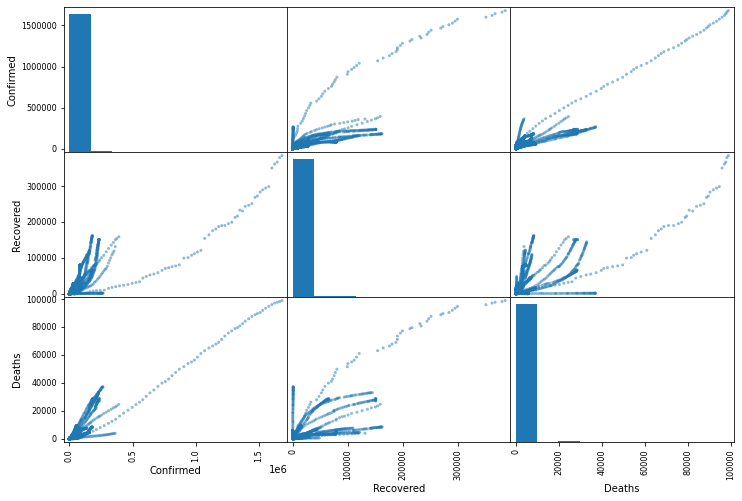

In [283]:
from pandas.plotting import scatter_matrix
attributes=["Confirmed","Recovered","Deaths"]
scatter_matrix(df[attributes],figsize=(12,8))
plt.show()
#all are psoitively correlated

In [284]:
df.shape

(23688, 5)

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [286]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [287]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [288]:
x=df.groupby("Country")["Deaths"].sum().sort_values(ascending=False).to_frame()
x
#grouping by the highest death

,Deaths
Country,
US,3221969
Italy,1568276
United Kingdom,1329006
Spain,1302010
France,1209634
...,...
Saint Vincent and the Grenadines,0
Fiji,0
Mongolia,0


In [289]:
df = df[(df.Confirmed != 0) ]
#dropping counties with zero cases

In [290]:
df.drop("Date",axis=1,inplace=True)
df.drop("Country",axis=1,inplace=True)

In [291]:
df.skew()

Confirmed    15.219955
Recovered     8.645393
Deaths       11.541737
dtype: float64

In [292]:
from scipy import stats
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
threshold=3

In [293]:
df =df[(z < 3).all(axis=1)]
#removing outliers

In [294]:
df.skew()


Confirmed    6.120025
Recovered    6.462332
Deaths       8.324282
dtype: float64

In [295]:
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>1.5:
        df[col]=np.log1p(df[col])
#removing skewness 

In [296]:
df.skew()

Confirmed    0.102100
Recovered    0.370095
Deaths       0.903752
dtype: float64

In [297]:
corr_matrix=df.corr()
corr_matrix["Deaths"].sort_values(ascending=False)
#both have high correlation

Deaths       1.000000
Confirmed    0.893045
Recovered    0.843101
Name: Deaths, dtype: float64

In [298]:
x=df.drop("Deaths",axis=1)

y=y=np.array(df["Deaths"])

In [299]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
df_x=sc.transform(x)
df_x=pd.DataFrame(x,columns=x.columns)

In [300]:
x=df.to_numpy()
y=df.to_numpy()

In [301]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [302]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [303]:
model=LinearRegression().fit(x_train,y_train)

In [304]:
y_pred=model.predict(y_test)

In [305]:
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score is:', r2_score(y_test,y_pred))

RMSE is: 2.0575055376710667e-15
r2_score is: 1.0


In [306]:
cross_val_score(model,x,y,cv=10,scoring="r2").mean()

1.0

In [310]:
import joblib
joblib.dump(model,"covid_lr.pkl")

['covid_lr.pkl']